In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('../../data/clean_data/clean01.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13338 entries, 0 to 13337
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   track_name         13338 non-null  object 
 1   track_popularity   13338 non-null  int64  
 2   artist_name        13338 non-null  object 
 3   album              13334 non-null  object 
 4   artist_genres      13338 non-null  object 
 5   artist_popularity  13338 non-null  int64  
 6   danceability       13338 non-null  float64
 7   energy             13338 non-null  float64
 8   key                13338 non-null  int64  
 9   loudness           13338 non-null  float64
 10  mode               13338 non-null  int64  
 11  speechiness        13338 non-null  float64
 12  acousticness       13338 non-null  float64
 13  instrumentalness   13338 non-null  float64
 14  liveness           13338 non-null  float64
 15  valence            13338 non-null  float64
 16  tempo              133

In [5]:
df.head()

,track_name,track_popularity,artist_name,album,artist_genres,artist_popularity,danceability,energy,key,loudness,...,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genre,artist_encoded,album_encoded
0,Working Man,51,Otis Rush,Mourning In The Morning,"['blues', 'blues rock', 'chicago blues', 'elec...",41,0.633,0.625,0,-10.951,...,0.492,0.000418,0.204,0.841,103.355,147800,4,1,3879,5734
1,Long Way Home,38,"Clarence ""Gatemouth"" Brown",Long Way Home,"['blues', 'blues rock', 'memphis blues', 'mode...",33,0.728,0.054,11,-22.557,...,0.910,0.048000,0.120,0.425,78.033,338333,4,1,1024,5133
2,She's A Sweet One,49,Junior Wells,Calling All Blues,"['blues', 'blues rock', 'chicago blues', 'elec...",41,0.705,0.483,1,-12.209,...,0.150,0.026500,0.202,0.713,122.863,181786,4,1,2716,1547
3,Help Me,59,Sonny Boy Williamson II,More Real Folk Blues,"['acoustic blues', 'blues', 'blues rock', 'chi...",46,0.745,0.436,5,-9.617,...,0.597,0.021300,0.610,0.771,114.216,188200,4,1,4642,5703
4,Take Out Some Insurance,51,Jimmy Reed,Rockin' With Reed,"['blues', 'blues rock', 'chicago blues', 'elec...",42,0.747,0.288,9,-14.435,...,0.663,0.000000,0.122,0.566,111.330,143332,4,1,2488,7228


In [6]:
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from collections import Counter
from imblearn.under_sampling import NearMiss
from numpy import where
from sklearn.ensemble import RandomForestClassifier


In [7]:
X = df[['track_popularity', 'artist_popularity', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature', 'artist_encoded', 'album_encoded']]
y = df['genre']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [8]:
rfc2 = RandomForestClassifier(n_estimators = 300) 

rfc2.fit(X_train, y_train)

y_pred = rfc2.predict(X_test)

print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))
print("RECALL OF THE MODEL: ", metrics.recall_score(y_test, y_pred, average='macro'))
print("SCORE IN TEST: ", rfc2.score(X_test, y_test))
print("SCORE IN TRAIN: ", rfc2.score(X_train, y_train))

ACCURACY OF THE MODEL:  0.6761619190404797
RECALL OF THE MODEL:  0.6731799335751961
SCORE IN TEST:  0.6761619190404797
SCORE IN TRAIN:  0.9850046860356139


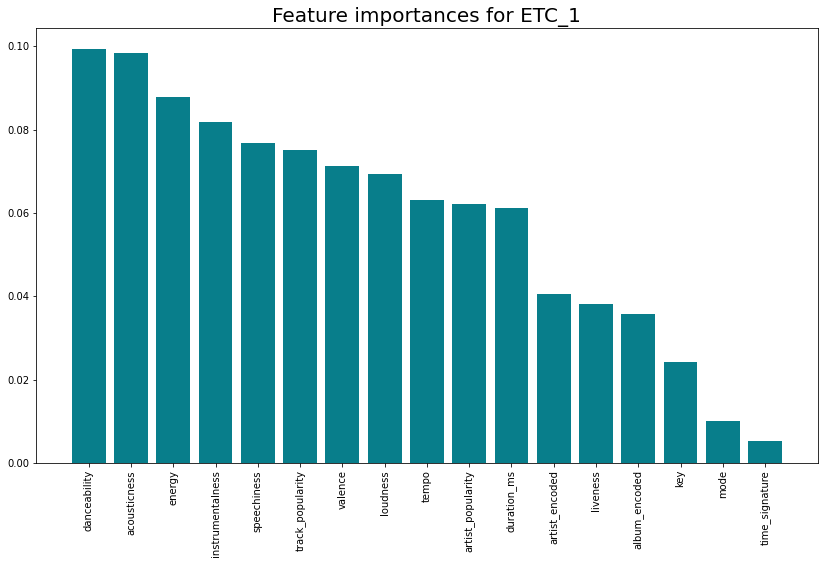

In [9]:
import matplotlib.pyplot as plt
importances = pd.DataFrame(data={
    'Attribute': X.columns,
    'Importance': rfc2.feature_importances_})

importances = importances.sort_values(by='Importance', ascending=False)
plt.figure(figsize = (14,8))

plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances for ETC_1', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [10]:
X = df[['track_popularity', 'artist_popularity', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'valence', 'tempo', 'duration_ms', 'time_signature', 'artist_encoded']]
y = df['genre']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [11]:
rfc2 = RandomForestClassifier(n_estimators = 300) 

rfc2.fit(X_train, y_train)

y_pred = rfc2.predict(X_test)

print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))
print("RECALL OF THE MODEL: ", metrics.recall_score(y_test, y_pred, average='macro'))
print("SCORE IN TEST: ", rfc2.score(X_test, y_test))
print("SCORE IN TRAIN: ", rfc2.score(X_train, y_train))

ACCURACY OF THE MODEL:  0.6652923538230885
RECALL OF THE MODEL:  0.6601314405194677
SCORE IN TEST:  0.6652923538230885
SCORE IN TRAIN:  0.9852858481724461


In [12]:
df2 = pd.read_csv('../../data/clean_data/clean02.csv')

In [13]:
X = df2[['track_popularity', 'artist_popularity', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature', 'artist_encoded', 'album_encoded']]
y = df2['genre']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [14]:
rfc2 = RandomForestClassifier(n_estimators = 300) 

rfc2.fit(X_train, y_train)

y_pred = rfc2.predict(X_test)

print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))
print("RECALL OF THE MODEL: ", metrics.recall_score(y_test, y_pred, average='macro'))
print("SCORE IN TEST: ", rfc2.score(X_test, y_test))
print("SCORE IN TRAIN: ", rfc2.score(X_train, y_train))

ACCURACY OF THE MODEL:  0.6656671664167916
RECALL OF THE MODEL:  0.6602517031087208
SCORE IN TEST:  0.6656671664167916
SCORE IN TRAIN:  0.9857544517338331


In [15]:
X = df2[['track_popularity', 'artist_popularity', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature', 'artist_encoded', 'album_encoded']]
y = df2['genre']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [16]:
rfc2 = RandomForestClassifier(n_estimators = 300) 

rfc2.fit(X_train, y_train)

y_pred = rfc2.predict(X_test)

print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))
print("RECALL OF THE MODEL: ", metrics.recall_score(y_test, y_pred, average='macro'))
print("SCORE IN TEST: ", rfc2.score(X_test, y_test))
print("SCORE IN TRAIN: ", rfc2.score(X_train, y_train))

ACCURACY OF THE MODEL:  0.6874062968515742
RECALL OF THE MODEL:  0.6809875419306088
SCORE IN TEST:  0.6874062968515742
SCORE IN TRAIN:  0.984817244611059


In [17]:
df3 = pd.read_csv('../../data/clean_data/clean03.csv')

In [18]:
X = df3[['track_popularity', 'artist_popularity', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature', 'artist_encoded', 'album_encoded']]
y = df3['genre']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [19]:
rfc2 = RandomForestClassifier(n_estimators = 300) 

rfc2.fit(X_train, y_train)

y_pred = rfc2.predict(X_test)

print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))
print("RECALL OF THE MODEL: ", metrics.recall_score(y_test, y_pred, average='macro'))
print("SCORE IN TEST: ", rfc2.score(X_test, y_test))
print("SCORE IN TRAIN: ", rfc2.score(X_train, y_train))

ACCURACY OF THE MODEL:  0.6686656671664168
RECALL OF THE MODEL:  0.67021638674557
SCORE IN TEST:  0.6686656671664168
SCORE IN TRAIN:  0.9858481724461106


In [20]:
df4 = pd.read_csv('../../data/clean_data/clean04.csv')

In [21]:
X = df4[['track_popularity', 'artist_popularity', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature', 'artist_encoded', 'album_encoded']]
y = df4['genre']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [22]:
rfc2 = RandomForestClassifier(n_estimators = 300) 

rfc2.fit(X_train, y_train)

y_pred = rfc2.predict(X_test)

print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))
print("RECALL OF THE MODEL: ", metrics.recall_score(y_test, y_pred, average='macro'))
print("SCORE IN TEST: ", rfc2.score(X_test, y_test))
print("SCORE IN TRAIN: ", rfc2.score(X_train, y_train))

ACCURACY OF THE MODEL:  0.6645427286356822
RECALL OF THE MODEL:  0.6632576778794793
SCORE IN TEST:  0.6645427286356822
SCORE IN TRAIN:  0.98659793814433


In [23]:
X = df4[['track_popularity', 'artist_popularity', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'valence', 'tempo', 'duration_ms', 'time_signature', 'artist_encoded']]
y = df4['genre']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [24]:
rfc2 = RandomForestClassifier(n_estimators = 300) 

rfc2.fit(X_train, y_train)

y_pred = rfc2.predict(X_test)

print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))
print("RECALL OF THE MODEL: ", metrics.recall_score(y_test, y_pred, average='macro'))
print("SCORE IN TEST: ", rfc2.score(X_test, y_test))
print("SCORE IN TRAIN: ", rfc2.score(X_train, y_train))

ACCURACY OF THE MODEL:  0.6776611694152923
RECALL OF THE MODEL:  0.6710216105715312
SCORE IN TEST:  0.6776611694152923
SCORE IN TRAIN:  0.9860356138706654


In [25]:
df5 = pd.read_csv('../../data/clean_data/clean05.csv')

In [26]:
X = df5[['track_popularity', 'artist_popularity', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature', 'artist_encoded', 'album_encoded']]
y = df5['genre']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [27]:
rfc2 = RandomForestClassifier(n_estimators = 300) 

rfc2.fit(X_train, y_train)

y_pred = rfc2.predict(X_test)

print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))
print("RECALL OF THE MODEL: ", metrics.recall_score(y_test, y_pred, average='macro'))
print("SCORE IN TEST: ", rfc2.score(X_test, y_test))
print("SCORE IN TRAIN: ", rfc2.score(X_train, y_train))

ACCURACY OF THE MODEL:  0.6709145427286357
RECALL OF THE MODEL:  0.668192716744116
SCORE IN TEST:  0.6709145427286357
SCORE IN TRAIN:  0.9850984067478913


In [28]:
X = df5[['track_popularity', 'artist_popularity', 'danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'valence', 'tempo', 'duration_ms', 'time_signature', 'artist_encoded']]
y = df5['genre']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [29]:
rfc2 = RandomForestClassifier(n_estimators = 300) 

rfc2.fit(X_train, y_train)

y_pred = rfc2.predict(X_test)

print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))
print("RECALL OF THE MODEL: ", metrics.recall_score(y_test, y_pred, average='macro'))
print("SCORE IN TEST: ", rfc2.score(X_test, y_test))
print("SCORE IN TRAIN: ", rfc2.score(X_train, y_train))

ACCURACY OF THE MODEL:  0.6630434782608695
RECALL OF THE MODEL:  0.657848875257316
SCORE IN TEST:  0.6630434782608695
SCORE IN TRAIN:  0.9861293345829428


In [30]:
df6 = pd.read_csv('../../data/clean_data/clean06.csv')

In [31]:
X = df6[['track_popularity', 'artist_popularity', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature', 'artist_encoded', 'album_encoded']]
y = df6['genre']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [32]:
rfc2 = RandomForestClassifier(n_estimators = 300) 

rfc2.fit(X_train, y_train)

y_pred = rfc2.predict(X_test)

print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))
print("RECALL OF THE MODEL: ", metrics.recall_score(y_test, y_pred, average='macro'))
print("SCORE IN TEST: ", rfc2.score(X_test, y_test))
print("SCORE IN TRAIN: ", rfc2.score(X_train, y_train))

ACCURACY OF THE MODEL:  0.6664167916041979
RECALL OF THE MODEL:  0.6593574189383061
SCORE IN TEST:  0.6664167916041979
SCORE IN TRAIN:  0.9858481724461106


In [33]:
df7 = pd.read_csv('../../data/clean_data/clean07.csv')

In [34]:
X = df7[['track_popularity', 'artist_popularity', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature', 'artist_encoded', 'album_encoded', 'artist_genre_blues', 'artist_genre_classical', 'artist_genre_disco', 'artist_genre_country', 'artist_genre_electronic', 'artist_genre_hiphop', 'artist_genre_metal', 'artist_genre_jazz', 'artist_genre_pop', 'artist_genre_reggae', 'artist_genre_rock', 'artist_genre_latin']]
y = df7['genre']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [35]:
rfc2 = RandomForestClassifier(n_estimators = 300) 

rfc2.fit(X_train, y_train)

y_pred = rfc2.predict(X_test)

print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))
print("RECALL OF THE MODEL: ", metrics.recall_score(y_test, y_pred, average='macro'))
print("SCORE IN TEST: ", rfc2.score(X_test, y_test))
print("SCORE IN TRAIN: ", rfc2.score(X_train, y_train))

ACCURACY OF THE MODEL:  0.9029235382308846
RECALL OF THE MODEL:  0.9021736259646368
SCORE IN TEST:  0.9029235382308846
SCORE IN TRAIN:  0.9860356138706654


In [36]:
rfc2.feature_importances_

array([0.04930181, 0.03864034, 0.03370266, 0.04200833, 0.00778129,
       0.03209904, 0.00320371, 0.02445725, 0.04814262, 0.04067248,
       0.01310445, 0.0255484 , 0.02285932, 0.02343786, 0.00140944,
       0.01562147, 0.01265038, 0.04703171, 0.03803636, 0.04286796,
       0.0602122 , 0.04312824, 0.0611008 , 0.0523381 , 0.04676707,
       0.03341249, 0.05846328, 0.0364944 , 0.04550653])

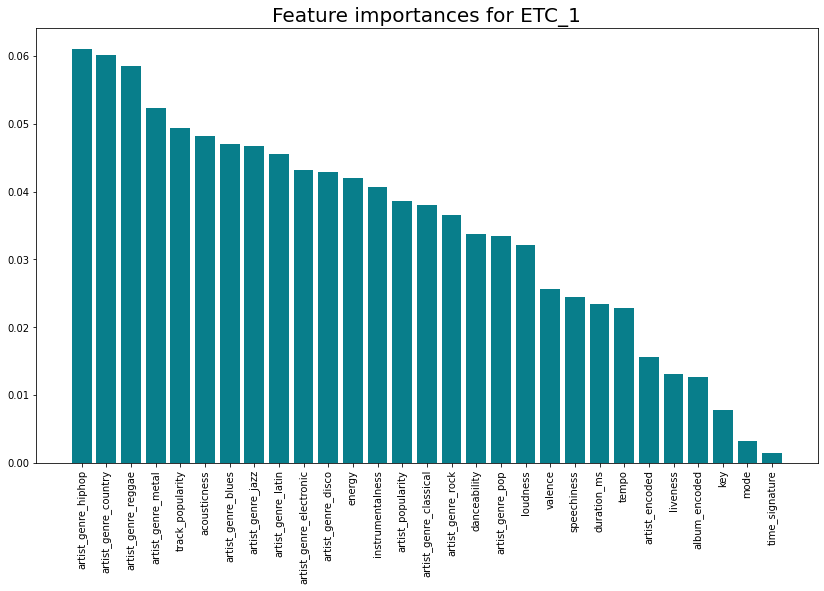

In [37]:
import matplotlib.pyplot as plt
importances = pd.DataFrame(data={
    'Attribute': X.columns,
    'Importance': rfc2.feature_importances_})

importances = importances.sort_values(by='Importance', ascending=False)
plt.figure(figsize = (14,8))

plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances for ETC_1', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [66]:
df8 = pd.read_csv('../../data/clean_data/clean08.csv')

In [67]:
X = df8[['track_popularity', 'artist_popularity', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 
        'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature', 
        'artist_encoded', 'album_encoded']]
y = df8['genre']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [68]:
rfc2 = RandomForestClassifier(n_estimators = 300) 

rfc2.fit(X_train, y_train)

y_pred = rfc2.predict(X_test)

print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))
print("RECALL OF THE MODEL: ", metrics.recall_score(y_test, y_pred, average='macro'))
print("SCORE IN TEST: ", rfc2.score(X_test, y_test))
print("SCORE IN TRAIN: ", rfc2.score(X_train, y_train))

ACCURACY OF THE MODEL:  0.6626686656671664
RECALL OF THE MODEL:  0.6612853823431746
SCORE IN TEST:  0.6626686656671664
SCORE IN TRAIN:  0.9847235238987816


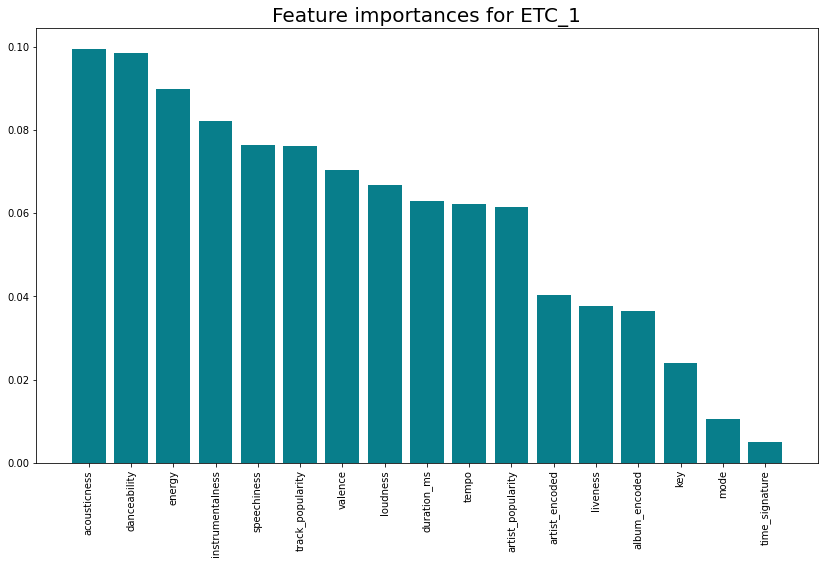

In [69]:
import matplotlib.pyplot as plt
importances = pd.DataFrame(data={
    'Attribute': X.columns,
    'Importance': rfc2.feature_importances_})

importances = importances.sort_values(by='Importance', ascending=False)
plt.figure(figsize = (14,8))

plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances for ETC_1', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [70]:
df9 = pd.read_csv('../../data/clean_data/clean09.csv')

In [72]:
X = df9[['track_popularity', 'artist_popularity', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 
        'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature', 
        'artist_encoded', 'album_encoded']]
y = df9['genre']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [73]:
rfc2 = RandomForestClassifier(n_estimators = 300) 

rfc2.fit(X_train, y_train)

y_pred = rfc2.predict(X_test)

print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))
print("RECALL OF THE MODEL: ", metrics.recall_score(y_test, y_pred, average='macro'))
print("SCORE IN TEST: ", rfc2.score(X_test, y_test))
print("SCORE IN TRAIN: ", rfc2.score(X_train, y_train))

ACCURACY OF THE MODEL:  0.6637931034482759
RECALL OF THE MODEL:  0.6610038665793466
SCORE IN TEST:  0.6637931034482759
SCORE IN TRAIN:  0.9856607310215557


In [74]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns = X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

In [75]:
rfc2 = RandomForestClassifier(n_estimators = 300) 

rfc2.fit(X_train, y_train)

y_pred = rfc2.predict(X_test)

print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))
print("RECALL OF THE MODEL: ", metrics.recall_score(y_test, y_pred, average='macro'))
print("SCORE IN TEST: ", rfc2.score(X_test, y_test))
print("SCORE IN TRAIN: ", rfc2.score(X_train, y_train))

ACCURACY OF THE MODEL:  0.6626686656671664
RECALL OF THE MODEL:  0.660067757004979
SCORE IN TEST:  0.6626686656671664
SCORE IN TRAIN:  0.9856607310215557


In [76]:
# Train random forest model with optimal parameters
rf = RandomForestClassifier(max_depth=25, min_samples_leaf=1, min_samples_split=5, n_estimators=1200)
rf.fit(X_train, y_train)
# Probabilities of each genre 
rf_probs = rf.predict_proba(X_test)

y_pred = rf.predict(X_test)

print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))
print("RECALL OF THE MODEL: ", metrics.recall_score(y_test, y_pred, average='macro'))
print("SCORE IN TEST: ", rf.score(X_test, y_test))
print("SCORE IN TRAIN: ", rf.score(X_train, y_train))

ACCURACY OF THE MODEL:  0.6622938530734632
RECALL OF THE MODEL:  0.6592491085380788
SCORE IN TEST:  0.6622938530734632
SCORE IN TRAIN:  0.9845360824742269


In [77]:
from random import random
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X,y)

X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size = 0.20, stratify=y_ros)

In [78]:
# Train random forest model with optimal parameters
rf = RandomForestClassifier(max_depth=25, min_samples_leaf=1, min_samples_split=5, n_estimators=1200)
rf.fit(X_train, y_train)
# Probabilities of each genre 
rf_probs = rf.predict_proba(X_test)

y_pred = rf.predict(X_test)

print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))
print("RECALL OF THE MODEL: ", metrics.recall_score(y_test, y_pred, average='macro'))
print("SCORE IN TEST: ", rf.score(X_test, y_test))
print("SCORE IN TRAIN: ", rf.score(X_train, y_train))

ACCURACY OF THE MODEL:  0.8340579710144927
RECALL OF THE MODEL:  0.8340579710144929
SCORE IN TEST:  0.8340579710144927
SCORE IN TRAIN:  0.9864130434782609


In [86]:
# Randomly over sample the minority class
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote= smote.fit_resample(X_train, y_train)
# Check the number of records after over sampling
print(sorted(Counter(y_train_smote).items()))

X_train, X_test, y_train, y_test = train_test_split(X_train_smote, y_train_smote, test_size = 0.20)

[(1, 1131), (2, 1131), (3, 1131), (4, 1131), (5, 1131), (6, 1131), (7, 1131), (8, 1131), (9, 1131), (10, 1131), (11, 1131), (12, 1131)]


In [83]:
# Train random forest model with optimal parameters
rf = RandomForestClassifier(max_depth=25, min_samples_leaf=1, min_samples_split=5, n_estimators=1200)
rf.fit(X_train, y_train)
# Probabilities of each genre 
rf_probs = rf.predict_proba(X_test)

y_pred = rf.predict(X_test)

print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))
print("RECALL OF THE MODEL: ", metrics.recall_score(y_test, y_pred, average='macro'))
print("SCORE IN TEST: ", rf.score(X_test, y_test))
print("SCORE IN TRAIN: ", rf.score(X_train, y_train))

ACCURACY OF THE MODEL:  0.8064613526570048
RECALL OF THE MODEL:  0.8090096413900493
SCORE IN TEST:  0.8064613526570048
SCORE IN TRAIN:  0.9887530193236715


In [55]:
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))
print("RECALL OF THE MODEL: ", metrics.recall_score(y_test, y_pred, average='macro'))
print("SCORE IN TEST: ", clf.score(X_test, y_test))
print("SCORE IN TRAIN: ", clf.score(X_train, y_train))

ACCURACY OF THE MODEL:  0.08381642512077295
RECALL OF THE MODEL:  0.08381642512077296
SCORE IN TEST:  0.08381642512077295
SCORE IN TRAIN:  0.08152173913043478


In [90]:
# Randomly under sample the majority class
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus= rus.fit_resample(X_train, y_train)

X_train, X_test, y_train, y_test = train_test_split(X_train_smote, y_train_smote, test_size = 0.20)

In [91]:
# Train random forest model with optimal parameters
rf = RandomForestClassifier(max_depth=25, min_samples_leaf=1, min_samples_split=5, n_estimators=1200)
rf.fit(X_train, y_train)
# Probabilities of each genre 
rf_probs = rf.predict_proba(X_test)

y_pred = rf.predict(X_test)

print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))
print("RECALL OF THE MODEL: ", metrics.recall_score(y_test, y_pred, average='macro'))
print("SCORE IN TEST: ", rf.score(X_test, y_test))
print("SCORE IN TRAIN: ", rf.score(X_train, y_train))

ACCURACY OF THE MODEL:  0.7871086556169429
RECALL OF THE MODEL:  0.7853095492504735
SCORE IN TEST:  0.7871086556169429
SCORE IN TRAIN:  0.9903288201160542


In [94]:
# Under sample the majority class
nearmiss = NearMiss(version=3)
X_train_nearmiss, y_train_nearmiss= nearmiss.fit_resample(X_train, y_train)

X_train, X_test, y_train, y_test = train_test_split(X_train_smote, y_train_smote, test_size = 0.20)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/imblearn/under_sampling/_prototype_selection/_nearmiss.py:189: UserWarning: The number of the samples to be selected is larger than the number of samples available. The balancing ratio cannot be ensure and all samples will be returned.
  "The number of the samples to be selected is larger"
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/imblearn/under_sampling/_prototype_selection/_nearmiss.py:189: UserWarning: The number of the samples to be selected is larger than the number of samples available. The balancing ratio cannot be ensure and all samples will be returned.
  "The number of the samples to be selected is larger"
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/imblearn/under_sampling/_prototype_selection/_nearmiss.py:189: UserWarning: The number of the samples to be selected is larger than the number of samples available. The balancing ratio

In [95]:
# Train random forest model with optimal parameters
rf = RandomForestClassifier(max_depth=25, min_samples_leaf=1, min_samples_split=5, n_estimators=1200)
rf.fit(X_train, y_train)
# Probabilities of each genre 
rf_probs = rf.predict_proba(X_test)

y_pred = rf.predict(X_test)

print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))
print("RECALL OF THE MODEL: ", metrics.recall_score(y_test, y_pred, average='macro'))
print("SCORE IN TEST: ", rf.score(X_test, y_test))
print("SCORE IN TRAIN: ", rf.score(X_train, y_train))

ACCURACY OF THE MODEL:  0.7863720073664825
RECALL OF THE MODEL:  0.7873065525510586
SCORE IN TEST:  0.7863720073664825
SCORE IN TRAIN:  0.9908814589665653
